# 多类分类

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

# 扩展逻辑回归运用到一对多分类

读取训练数据集

In [2]:
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
data['X'].shape,data['y'].shape

((5000, 400), (5000, 1))

## 显示训练集中的灰度图片

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

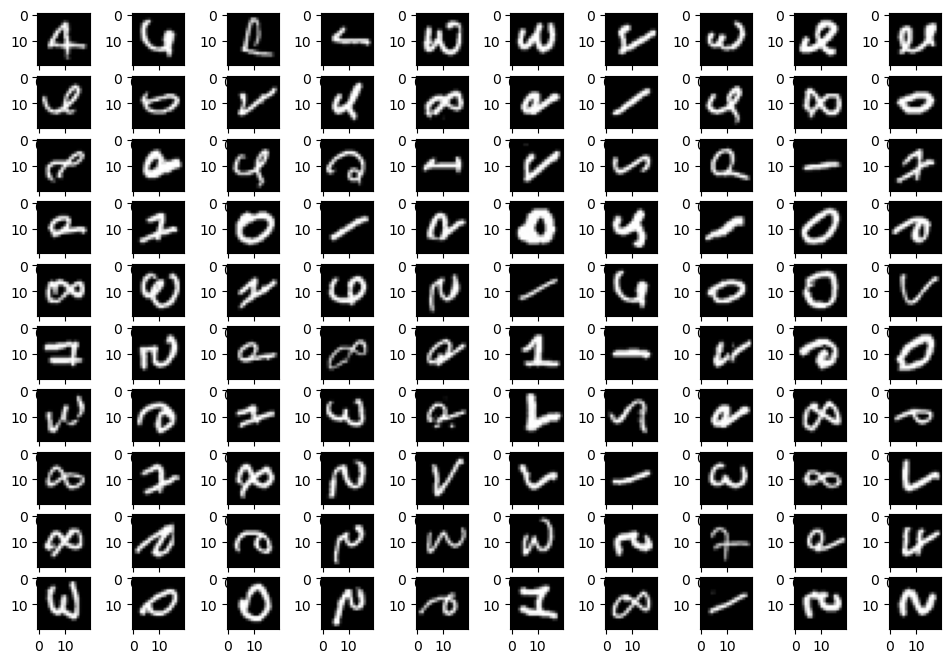

In [4]:
#随机显示100个样本图像
nums = np.random.randint(0,5001,100)
fig,ax = plt.subplots(10,10,figsize=(12,8))

def generateImg(mums):
    for i in mums:
        img = data['X'][i].reshape(20,20)
        imgofthree = np.concatenate((np.expand_dims(img, axis=2), 
                                                  np.expand_dims(img, axis=2), 
                                                  np.expand_dims(img, axis=2)), axis=2)
        yield imgofthree


generate = generateImg(nums)
for r in range(10):
     for c in range(10):
        ax[r][c].imshow(next(generate))


## sigmoid函数
\\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## 向量化逻辑回归

### 向量化逻辑回归代价函数（已经正则化）

In [6]:
def costReg(theta,X,y,learningRate):
    """
        逻辑回归代价函数，直接添加正则项即可
    """
    #是个行向量
    theta = np.matrix(theta)
    #X每行是一个样本
    X=np.matrix(X)
    y=np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))
    reg = (learningRate / (2*len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]],2))
           
    return np.sum(first-second) / len(X) + reg

\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

### 带循环的梯度函数（已经正则化）

In [7]:
def gradient_with_loop(theta,X,y,learningRate):
    """
        根据给定的theta，计算J（Θ）对应于每个θ的偏导数
        @return 偏导数的列表
    """
    #是个行向量
    theta = np.matrix(theta)
    #X每行是一个样本
    X=np.matrix(X)
    y=np.matrix(y)
    
    #计算n+1个关于THETA的偏导数
    parameters = int(theta.ravel().shape[1])
    #存储n+1个偏导数在theta值集上的值
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T) -y
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        
        if(i==0):
            grad[i] = np.sum(term)/len(X)
        else:
            grad[i] = (np.sum(term)/len(X))+(learningRate/len(X))*theta[:,i]
    return grad

### 向量化的梯度函数（已经正则化）

In [8]:
def gradient(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    error = sigmoid(X * theta.T) - y
    
    #矩阵化了求和运算
    grad = ((X.T * error) / len(X)).T + ((learningRate / len(X)) * theta)
    
    # intercept gradient is not regularized
    grad[0, 0] = np.sum(np.multiply(error, X[:,0])) / len(X)
    
    return np.array(grad).ravel()

### 执行一对多分类
有了上面的梯度，代价函数，激活函数，可以求得分类器的参数矩阵

In [9]:
from scipy.optimize import minimize

def one_vs_all(X,y,num_labels,learning_rate):
    rows = X.shape[0]
    params = X.shape[1]
    
    #创建Θ矩阵
    all_theta=np.zeros((num_labels,params+1))
    
    X = np.insert(X,0,values=np.ones(rows),axis=1)
    
    #识别为0的模型是由标签为10的对应
    for i in range(1,num_labels+1):
        #为每个模型初始化参数θ
        theta=np.zeros(params+1)
        #将y变成该类和非该类的标签数组
        y_i = np.array([1 if label ==i else 0 for label in y])
        y_i = np.reshape(y_i,(rows,1))
        
        #求参数的高级优化算法
        fmin = minimize(fun=costReg, x0=theta, args=(X, y_i, learning_rate), method='TNC', jac=gradient)
        all_theta[i-1,:] = fmin.x
    return all_theta
    
        

In [10]:
np.unique(data['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [11]:
all_theta = one_vs_all(data['X'],data['y'],10,1)
all_theta

array([[-2.38262219e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30443025e-03, -7.48519061e-10,  0.00000000e+00],
       [-3.18328834e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45565933e-03, -5.07997883e-04,  0.00000000e+00],
       [-4.79850113e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87680736e-05, -2.47832460e-07,  0.00000000e+00],
       ...,
       [-7.98746489e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.94565205e-05,  7.20837313e-06,  0.00000000e+00],
       [-4.57328172e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33528996e-03,  9.98190574e-05,  0.00000000e+00],
       [-5.40500337e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16588361e-04,  7.87229985e-06,  0.00000000e+00]])

### 一对多模型的预测

In [12]:
def predict_all(X, all_theta):
    rows = X.shape[0] #样本数量
    
    # same as before, insert ones to match the shape
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    
    # convert to matrices
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
    
    # compute the class probability for each class on each training instance
    h = sigmoid(X * all_theta.T)
    
    # create array of the index with the maximum probability
    h_argmax = np.argmax(h, axis=1) #最大值索引
    
    # because our array was zero-indexed we need to add one for the true label prediction
    h_argmax = h_argmax + 1
    
    return h_argmax #返回所有样本的预测结果

In [13]:
y_pred = predict_all(data['X'],all_theta)
correct = [1 if a==b else 0 for (a,b) in zip(y_pred,data['y'])]
accuracy=(sum(map(int,correct))) / float(len(correct))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 94.46%
